In [32]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

# В этой лабораторной работе вам предстоит обучить модель логистической регрессии.
# Представьте, что вы сотрудник приемной комиссии и хотите оценить шансы студента на прохождение на бюджет.
# У вас есть исторические данные о сдачах студентами двух входных экзаменов по 100-балльной шкале.
# Кроме того, данные размечены. То есть студенты, прошедшие отбор помечены меткой 1, остальные 0.

# Ваша задача - заполнить код в функциях:
# logistic - вычисляет логистическую функцию от аргумента,
# compute_cost - вычисляет функцию стоимости,
# compute_cost_grad - вычисляет градиент функции стоимости.

# В данной задаче будет использоваться градиентный метод оптимизации, определенный в библиотеке scipy, так что
# не нужно реализовывать градиентный спуск.

# По ходу работы смотрите в консоль. Там будут выводиться результаты написанных вами функций и ожидаемые результаты.
# Так вы сможете проверить себя.

# Комментарии к графикам:
# Первый график - исходные данные
# Второй - исходные данные с результатом работы модели - границей решений.
# Черным цветом обозначено поле, попадание точки в которое означает ее
# принадлежность к 1 классу (студент проходит на бюджет), белым - принадлежность к 0 классу (не проходит на бюджет).


def logistic(z):
    # Функция принимает аргумент z - скаляр, вектор или матрицу в виде объекта numpy.array()
    # Должна возвращать скяляр, вектор или матрицу (в зависимости от размерности z)
    # результатов вычисления логистической функции от элементов z
    result = 1/(1+np.exp(-z))
    return result


def compute_hypothesis(X, theta):
    return np.matmul(X, theta)

def compute_cost(X, y, theta):

    # Функция принимает матрицу данный X, вектор целевых переменных y и вектор параметров theta.
    # Должна возвратить число - результат вычисления функции стоимости в точке theta.
    
    m, n = X.shape  # m - количество примеров в выборке, n - количество признаков у каждого примера
    
    Sum = 0
    for i in range(m):
        Sum += (-y[i]*np.log(logistic(compute_hypothesis(X[i], theta))))-((1-y[i])*np.log(1-logistic(compute_hypothesis(X[i], theta))))
    
    cost = 1/m*Sum
    
    return float(cost)

def compute_cost_grad(X, y, theta):
    # Функция принимает матрицу данный X, вектор целевых переменных y и вектор параметров theta.
    # Должна возвратить вектор координат градиента функции стоимости в точке theta.
    # Вектор можно заполнять в виде списка python. При возврате он преобразуется в массив numpy.
#     print(X, y, theta)
    m, n = X.shape  # m - количество примеров в выборке, n - количество признаков у каждого примера
    grad = [0] * n  # вектор градиента функции стоимости по theta, его нужно заполнить
    
    Sum = 0
    for i in range(m):
        Sum += X[i]*(logistic(compute_hypothesis(X[i], theta))-y[i])
    grad = 1/m*Sum
    
    return np.array(grad)

def load_data(data_file_path):
    with open(data_file_path) as input_file:
        X = list()
        y = list()
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append([1] + row)
            y.append(label)
        return np.array(X, float), np.array(y, float)

logistic(0) = 0.5 (должно быть 0.5)
logistic(-10) = 4.5397868702434395e-05 (должно быть ~0)
logistic(10) = 0.9999546021312976 (должно быть ~1)


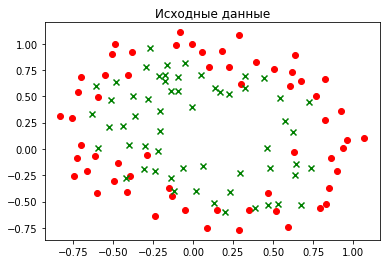

Функция стоимости при начальном theta = 0.6931 (должно быть ~0.693)
[8.47457627e-03 1.87880932e-02 7.77711864e-05]
     fun: 0.6902411220273086
     jac: array([ 1.08607158e-07, -8.68183697e-07, -5.75879032e-07])
 message: 'Optimization terminated successfully.'
    nfev: 18
     nit: 7
    njev: 18
  status: 0
 success: True
       x: array([-0.0141808 , -0.3035372 , -0.01814284])
Минимизация функции стоимости прошла успешно.


In [33]:
X, y = load_data('/content/drive/MyDrive/питон/2 практ/Лабораторная работа №2/lab2data2.txt')
print(f'logistic(0) = {logistic(np.array(0))} (должно быть 0.5)\n'
      f'logistic(-10) = {logistic(np.array(-10))} (должно быть ~0)\n'
      f'logistic(10) = {logistic(np.array(10))} (должно быть ~1)')
plt.title('Исходные данные')
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], c='r', marker='o')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='g', marker='x')
plt.show()
init_theta = np.zeros((X.shape[1], 1))
cost0 = compute_cost(X, y, init_theta)
print(f'Функция стоимости при начальном theta = {"%.4f"% cost0} (должно быть ~0.693)')
print(compute_cost_grad(X, y, init_theta))
opt_theta_obj = minimize(lambda th: compute_cost(X, y, th), init_theta,
                         method='CG',
                         jac=lambda th: compute_cost_grad(X, y, th),
                         options={'gtol': 1e-5, 'maxiter': 200, 'disp': False})
print(opt_theta_obj)
print('Минимизация функции стоимости ' + ('прошла успешно.' if opt_theta_obj.success else 'не удалась.'))

Функция стоимости при оптимальном theta = 0.6902411220273086 (должно быть ~0.203)


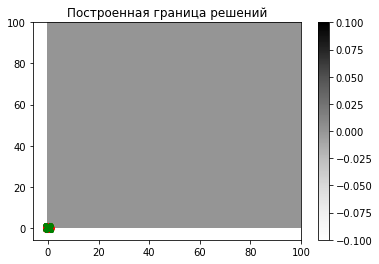

In [34]:
opt_theta = opt_theta_obj.x

opt_cost = compute_cost(X, y, opt_theta)
print(f'Функция стоимости при оптимальном theta = {opt_cost} (должно быть ~0.203)')

hm = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        hm[i, j] = round(logistic(opt_theta @ np.array([1, j, i])))
c = plt.pcolor(range(101), range(101), hm, cmap='Greys')
plt.colorbar(c)

plt.title('Построенная граница решений')
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], c='r', marker='o')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='g', marker='x')
plt.show()


In [35]:
def map_features(X):

    # Эта функция добавляет все комбинации признаков 2, 3, ..., 6 степеней в матрицу данных.
    # Это нужно для того, чтобы мы могли построить нелинейную границу решений.
    # При таком большом количестве признаков может возникнуть проблема переобучения
    # С ней мы и поборемся с помощью регуляризации.

    result = list()
    for k in range(X.shape[0] if len(X.shape) == 2 else 1):
        vec = list(X[k, :] if len(X.shape) == 2 else X)
        for i in range(2, 7):
            for j in range(i + 1):
                vec.append(vec[1] ** j * vec[2] ** (i - j))
        result.append(vec)
    return np.array(result)

def compute_cost_reg(X, y, theta, lamb):

    # Функция принимает матрицу данный X, вектор целевых переменных y и вектор параметров theta.
    # Кроме того, функция принимает параметр регуляризации lamb.
    # Должна возвратить число - результат вычисления функции стоимости в точке theta.

    m, n = X.shape  # m - количество примеров в выборке, n - количество признаков у каждого примера
    cost = 0  # значение функции стоимости при заданных параметрах, его нужно посчитать
    
    Sum = 0
    for i in range(m):
        Sum += -y[i]*np.log(logistic(compute_hypothesis(X[i], theta)))-(1-y[i])*np.log(1-logistic(compute_hypothesis(X[i], theta)))

    cost = 1/m*Sum +lamb/(m*2)*sum(theta**2)
    return float(cost)

def compute_cost_grad_reg(X, y, theta, lamb):
    # Функция принимает матрицу данный X, вектор целевых переменных y и вектор параметров theta.
    # Кроме того, функция принимает параметр регуляризации lamb.
    # Должна возвратить вектор координат градиента функции стоимости в точке theta.
    # Вектор можно заполнять в виде списка python. При возврате он преобразуется в массив numpy.

    m, n = X.shape  # m - количество примеров в выборке, n - количество признаков у каждого примера
    grad = [0] * n  # вектор градиента функции стоимости по theta, его нужно заполнить
    
    Sum = 0
    for i in range(m):
        Sum += X[i]*(logistic(compute_hypothesis(X[i], theta))-y[i])
        
    grad = 1/m*Sum + lamb/m*sum(theta)
    
    return np.array(grad)

logistic(0) = 0.5 (должно быть 0.5)
logistic(-10) = 4.5397868702434395e-05 (должно быть ~0)
logistic(10) = 0.9999546021312976 (должно быть ~1)


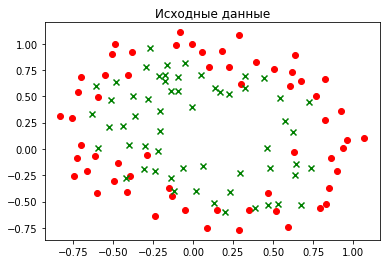

In [36]:
X, y = load_data('/content/drive/MyDrive/питон/2 практ/Лабораторная работа №2/lab2data2.txt')

X = map_features(X)

print(f'logistic(0) = {logistic(np.array(0))} (должно быть 0.5)\n'
      f'logistic(-10) = {logistic(np.array(-10))} (должно быть ~0)\n'
      f'logistic(10) = {logistic(np.array(10))} (должно быть ~1)')

plt.title('Исходные данные')
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], c='r', marker='o')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='g', marker='x')
plt.show()

In [37]:
lamb = 1.0
init_theta = np.zeros((X.shape[1], 1))
cost0 = compute_cost_reg(X, y, init_theta, lamb)
print(f'Функция стоимости при начальном theta = {cost0} (должно быть ~0.693)')

Функция стоимости при начальном theta = 0.6931471805599461 (должно быть ~0.693)


In [38]:
opt_theta_obj = minimize(lambda th: compute_cost_reg(X, y, th, lamb), init_theta,
                         method='CG',
                         jac=lambda th: compute_cost_grad_reg(X, y, th, lamb),
                         options={'gtol': 1e-5, 'maxiter': 1500, 'disp': False})
print(opt_theta_obj)
print('Минимизация функции стоимости ' + ('прошла успешно.' if opt_theta_obj.success else 'не удалась.'))

     fun: 0.6012616014785799
     jac: array([ 0.07818532, -0.0341504 , -0.00066536,  0.02850166, -0.00468787,
        0.02815734,  0.00238459, -0.01275337, -0.006511  , -0.02228825,
        0.01266131, -0.01401287, -0.00600949, -0.01564285,  0.00797467,
        0.00024308, -0.01421153, -0.01217738, -0.01722177, -0.01278431,
       -0.0166646 ,  0.00477124, -0.01633071, -0.01249446, -0.01798336,
       -0.01339233, -0.01766226, -0.00176325])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 47
     nit: 2
    njev: 36
  status: 2
 success: False
       x: array([ 1.18599752, -0.08694998,  0.78904248, -0.56695056, -0.1260031 ,
       -1.1915395 , -0.18383194,  0.04002761,  0.09711411, -0.16342761,
       -0.76449698,  0.18007899, -0.09510234,  0.22430213, -0.92981241,
       -0.50590537,  0.14234097,  0.12199526,  0.19656175,  0.16291528,
       -0.26954909, -0.790394  ,  0.24166481,  0.07149815,  0.28288927,
        0.0939558 ,  0.26520479, -0.67720771

In [39]:
opt_theta = opt_theta_obj.x

opt_cost = compute_cost_reg(X, y, opt_theta, lamb)
print(f'Функция стоимости при оптимальном theta = {opt_cost} (должно быть ~0.529)')

Функция стоимости при оптимальном theta = 0.6012616014785799 (должно быть ~0.529)


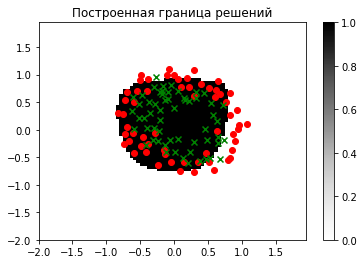

In [40]:
hm = np.zeros((80, 80))
for i in range(80):
    for j in range(80):
        hm[i, j] = round(logistic(opt_theta @ map_features(np.array([1, j / 20 - 2, i / 20 - 2])).transpose())[0])
c = plt.pcolor(np.arange(-2, 2, 0.05), np.arange(-2, 2, 0.05), hm, cmap='Greys')
plt.colorbar(c)

plt.title('Построенная граница решений')
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], c='r', marker='o')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='g', marker='x')
plt.show()